In [14]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = r'C:\Users\Francis Hung\Desktop\Datatrain'

In [15]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [16]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位 (pd.unique = 某個col中種類個數，去除重複的 )
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [18]:
app_train['DAYS_BIRTH_YEAR'] = abs(round(app_train['DAYS_BIRTH']/365))
app_train['DAYS_BIRTH_YEAR']

0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    46.0
Name: DAYS_BIRTH_YEAR, Length: 307511, dtype: float64

In [19]:
bins_cut = np.linspace(0,100,11)
app_train['DAYS_BIRTH_YEAR_DISCRET'] = pd.cut(app_train['DAYS_BIRTH_YEAR'],bins_cut)
app_train.DAYS_BIRTH_YEAR_DISCRET.describe()

count           307511
unique               5
top       (30.0, 40.0]
freq             82770
Name: DAYS_BIRTH_YEAR_DISCRET, dtype: object

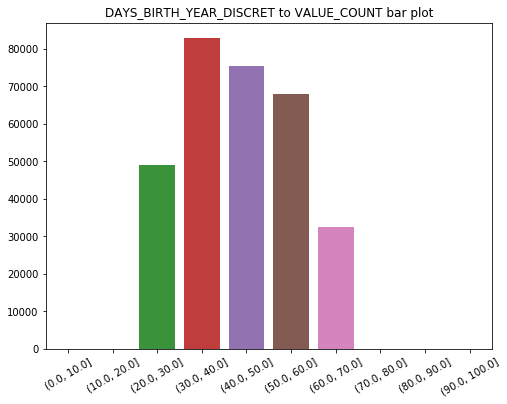

In [20]:
x = list(app_train['DAYS_BIRTH_YEAR_DISCRET'].value_counts().sort_index().values)
y = list(app_train['DAYS_BIRTH_YEAR_DISCRET'].value_counts().sort_index().index)
import seaborn as sns 

plt.figure(figsize=(8,6))
sns.barplot(y,x)
plt.title('DAYS_BIRTH_YEAR_DISCRET to VALUE_COUNT bar plot')
plt.xticks(rotation=30)
plt.show()

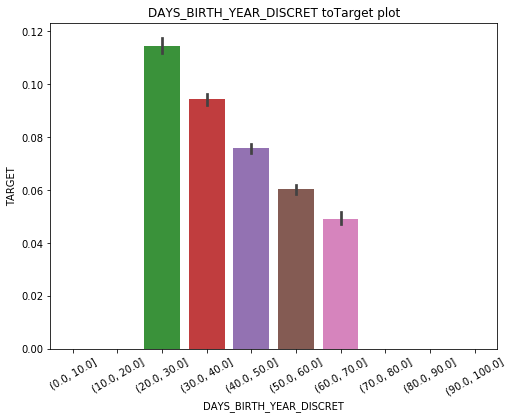

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(app_train['DAYS_BIRTH_YEAR_DISCRET'],app_train['TARGET'])
plt.title('DAYS_BIRTH_YEAR_DISCRET toTarget plot')
plt.xticks(rotation=30)
plt.show()